In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('C:/Users/USER/Desktop/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1 Make ‘PassengerId’ as the index column

In [9]:
data = pd.read_csv('C:/Users/USER/Desktop/titanic_dataset.csv',index_col='PassengerId')

In [10]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2 Basic details of dataset

In [11]:
data.shape

(891, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### 3 Checking null values of data

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#There are 177 null values in age column, 687 null values in cabin column and 2 null values in embarked column. 

In [14]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### 4 Fill in all missing values present in all columns

In [10]:
#check distribution of the data

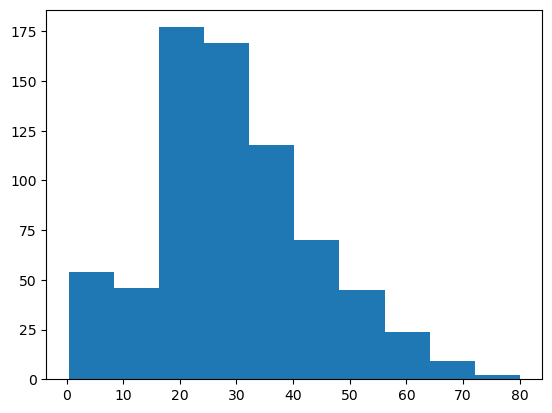

In [15]:
plt.hist(data['Age'])
plt.show()

In [16]:
data['Age'] =data['Age'].fillna(data['Age'].median())

In [17]:
data['Age'].isna().sum()

0

In [18]:
Cabin_mode = data['Cabin'].mode()[0]
Embarked_mode = data['Embarked'].mode()[0]

In [19]:
Cabin_mode

'B96 B98'

In [20]:
Embarked_mode

'S'

In [21]:
data['Cabin']=data['Cabin'].fillna(Cabin_mode)

In [22]:
data['Embarked']=data['Embarked'].fillna(Embarked_mode)

In [23]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### 5 Check and handle outliers in atleast 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot of Age column')

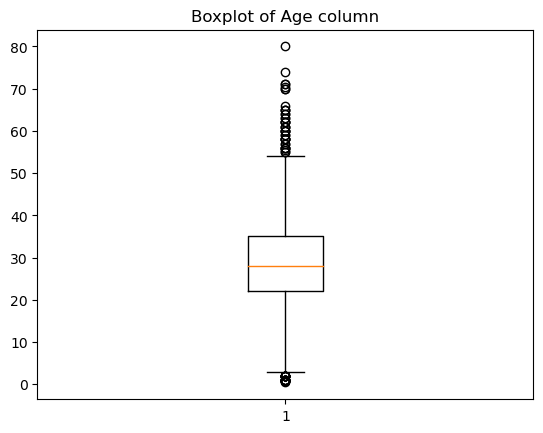

In [24]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')

In [25]:
Q1 = np.percentile(data['Age'], 25,interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50,interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75,interpolation='midpoint')

In [26]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [27]:
IQR = Q3-Q1

In [28]:
print(IQR)

13.0


In [29]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [30]:
print(low_limit)
print(up_limit)

2.5
54.5


In [31]:
outlier =[]
for x in data['Age']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [32]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [33]:
ind2 = data['Age']>up_limit

In [34]:
data.loc[ind2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [35]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [36]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S


Text(0.5, 1.0, 'Boxplot of Fare column')

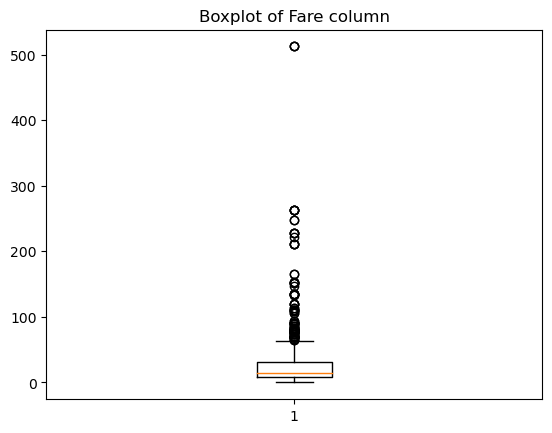

In [37]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')

In [38]:
Q1 = np.percentile(data['Fare'], 25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75,interpolation='midpoint')

In [39]:
print(Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [40]:
IQR = Q3-Q1

In [41]:
print(IQR)

22.6042


In [42]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [43]:
print(low_limit)
print(up_limit)

-26.0105
64.4063


In [44]:
outlier =[]
for x in data['Fare']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [45]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [46]:
ind3 = data['Fare']>up_limit

In [47]:
data.loc[ind3].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [48]:
data.drop([2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864] , inplace=True)

SyntaxError: invalid syntax (2185870698.py, line 3)

Text(0.5, 1.0, 'Boxplot of SibSp column')

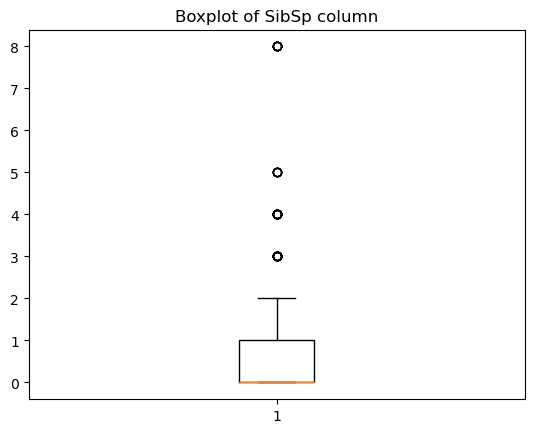

In [49]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp column')

In [50]:
Q1 = np.percentile(data['SibSp'], 25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75,interpolation='midpoint')

In [51]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [52]:
IQR = Q3-Q1

In [53]:
print(IQR)

1.0


In [54]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [55]:
print(low_limit)
print(up_limit)

-1.5
2.5


In [56]:
outlier =[]
for x in data['SibSp']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [57]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [58]:
ind4 = data['SibSp']>up_limit

In [59]:
data.loc[ind4].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [60]:
data.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [110]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


#### 6 Min max scaling

In [94]:
X = data.drop('Survived',axis=1)
y = data['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X = data.drop('Name',axis=1)

In [82]:
X = data.drop('Sex',axis=1)

In [83]:
X = data.drop('Ticket',axis=1)

In [84]:
X = data.drop('Cabin',axis=1)

In [85]:
X = data.drop('Embarked',axis=1)

In [96]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [97]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
minmax = MinMaxScaler(feature_range=(0,1))

In [100]:
X1 = minmax.fit_transform(X)

In [101]:
type(X1)

numpy.ndarray

In [102]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [105]:
X1 = pd.DataFrame(X1,columns=['PassengerId','Pclass','Age', 'SibSp', 'Parch', 'Fare'])

In [106]:
X1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
